<a href="https://colab.research.google.com/github/mersalas/MLBS-2025_workshop/blob/main/Lab_2a_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import fastai library
from fastai.vision.all import *

Download either of the following datasets:


*   [Philippine rice diseases](https://www.kaggle.com/datasets/gauravduttakiit/philippines-rice-diseases)
*   [Freshwater fish diseases](https://www.kaggle.com/datasets/subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia/data)



In [ ]:
# Unzip folder
from zipfile import ZipFile
with ZipFile("/content/fish_disease.zip", "r") as archive:
             archive.extractall("fish_disease")

In [ ]:
# Set the path to the dataset
path = Path("/content/fish_disease/freshwater")
path.ls()

(#3) [Path('/content/fish_disease/freshwater/Train.csv'),Path('/content/fish_disease/freshwater/Train'),Path('/content/fish_disease/freshwater/Test')]

In [ ]:
# List all image files in train directory
trn_path = path/'Train'
files = get_image_files(trn_path)
files

(#1747) [Path('/content/fish_disease/freshwater/Train/Viral diseases White tail disease/Viral diseases White tail disease (163).jpg'),Path('/content/fish_disease/freshwater/Train/Viral diseases White tail disease/Viral diseases White tail disease (77).jpg'),Path('/content/fish_disease/freshwater/Train/Viral diseases White tail disease/Viral diseases White tail disease (187).jpg'),Path('/content/fish_disease/freshwater/Train/Viral diseases White tail disease/Viral diseases White tail disease (9).jpeg'),Path('/content/fish_disease/freshwater/Train/Viral diseases White tail disease/Viral diseases White tail disease (179).jpg'),Path('/content/fish_disease/freshwater/Train/Viral diseases White tail disease/Viral diseases White tail disease (98).jpg'),Path('/content/fish_disease/freshwater/Train/Viral diseases White tail disease/Viral diseases White tail disease (148).jpg'),Path('/content/fish_disease/freshwater/Train/Viral diseases White tail disease/Viral diseases White tail disease (154).

(128, 128)


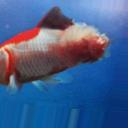

In [ ]:
# View the first image
img = PILImage.create(files[0])
print(img.size)
img.to_thumb(128)

In [ ]:
# Use parallel processing to get sizes of all images
from fastcore.parallel import*

def f(o): return PILImage.create(o).size
sizes = parallel(f, files, n_workers=8)
pd.Series(sizes).value_counts()

,count
"(128, 128)",1291
"(224, 224)",446
"(184, 136)",1
"(224, 110)",1
"(224, 73)",1
"(224, 69)",1
"(224, 71)",1
"(116, 212)",1
"(224, 97)",1
"(224, 62)",1


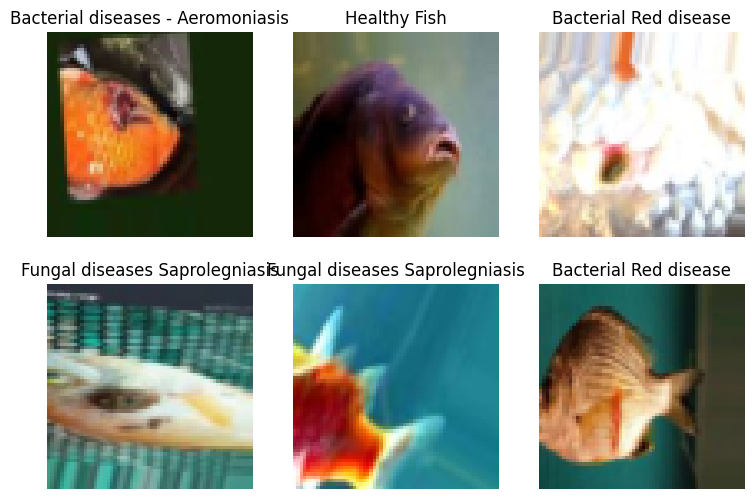

In [ ]:
# Create dataloader
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, seed=42,
                                   item_tfms=Resize(62, method='squish'),
                                   bacth_tfms=aug_transforms(size=128, min_scale=0.75))

dls.show_batch(max_n=6)

Pick model architecture here: [The best vision models for fine-tuning](https://www.kaggle.com/code/jhoward/the-best-vision-models-for-fine-tuning)

In [ ]:
# Create a CNN learner
learn = vision_learner(dls, 'resnet26d', metrics=[error_rate, accuracy], path='.').to_fp16()

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.0005754399462603033, slide=0.0030199517495930195)

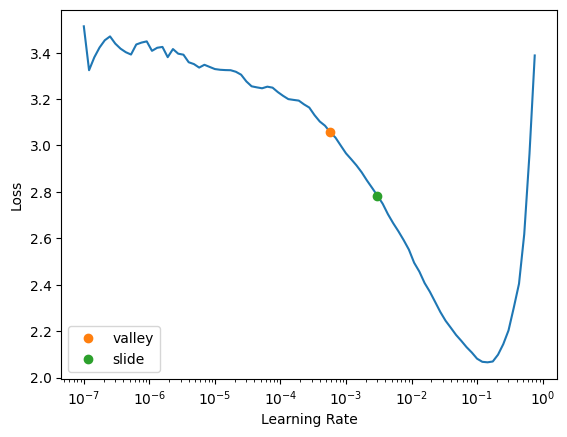

In [ ]:
# Find appropriate learning_rate
learn.lr_find(suggest_funcs=(valley, slide))

In [ ]:
# Fine tune the model
learn.fine_tune(3, 1e-1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.835389,4.906077,0.467049,0.532951,00:03


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.181802,5.535593,0.432665,0.567335,00:03
1,1.726062,0.975825,0.280802,0.719198,00:03
2,1.151308,0.860245,0.286533,0.713467,00:03


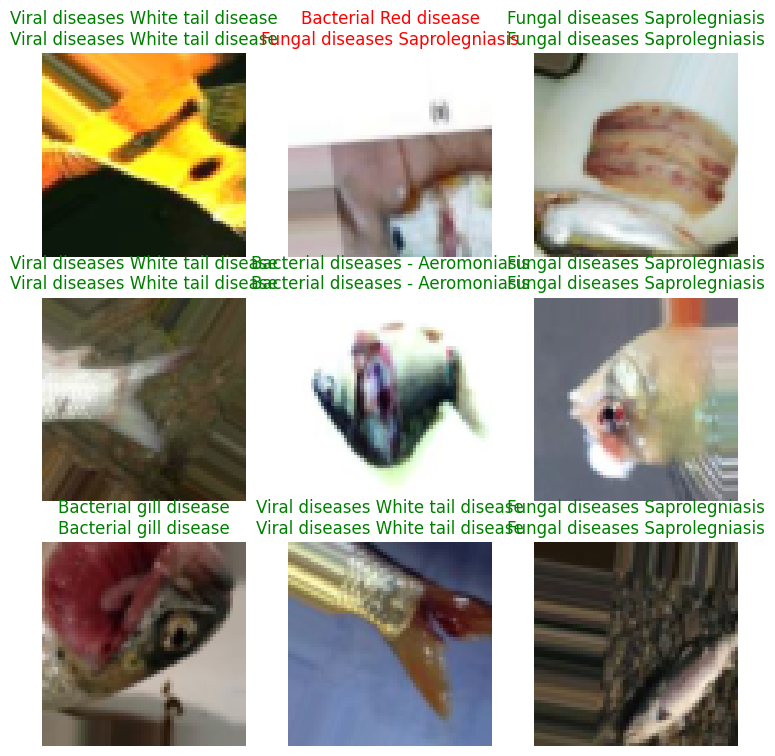

In [ ]:
learn.show_results()

In [ ]:
# Create test dataloader
tst_files = get_image_files(path/'Test')
tst_dl = dls.test_dl(tst_files)

In [ ]:
# Get predictions
preds, _ = learn.get_preds(dl=tst_dl)

In [ ]:
# Get the index of the highest probability class for each prediction
pred_idxs = preds.argmax(dim=1)

# Get the probability of the predicted class for each prediction
pred_probs = preds.max(dim=1).values

In [ ]:
# Map prediction indices to class labels
pred_labels = [dls.vocab[i] for i in pred_idxs]

In [ ]:
# Compile results into a DataFrame
results = pd.DataFrame({
    'filename': [f.name for f in tst_files],
    'predicted_class': pred_labels,
    'probability': pred_probs.numpy()
})

# Display the results
print(results.head())

                                     filename  \
0  Viral diseases White tail disease (77).jpg   
1  Viral diseases White tail disease (9).jpeg   
2  Viral diseases White tail disease (46).jpg   
3  Viral diseases White tail disease (41).jpg   
4  Viral diseases White tail disease (19).jpg   

                     predicted_class  probability  
0     Fungal diseases Saprolegniasis     0.620472  
1  Viral diseases White tail disease     0.994019  
2  Viral diseases White tail disease     0.994668  
3  Viral diseases White tail disease     0.949915  
4  Viral diseases White tail disease     0.999421  


## Exercise 2a

Train a CNN model incorporating the following:

*   convnext_small_in22k
*   padding
*   test time augmentation
*   [sample](https://www.kaggle.com/code/jhoward/small-models-road-to-the-top-part-2/)







